## Using Cluster Analysis for Customer Segmentation 

In [2]:
import pandas as pd

### What is the goal of Clustering?

* The goal of clustering is to split the data into well defined groups, to understand the instrinsic patterns present in the data

* Let us look at the high level overview of clustering through the images below

<img src='./img/customer_segmentation.jpg'/>

## Case Study: Customer Segmentation of Mall Visitors

In Data Analytics we often have very large data (many observations - "rows in a flat file"), which are however similar to each other hence we may want to organize them in a few clusters with similar observations within each cluster. For example, in the case of customer data, even though we may have data from millions of customers, these customers may only belong to a few segments: customers are similar within each segment but different across segments. We may often want to analyze each segment separately, as they may behave differently (e.g. different market segments may have different product preferences and behavioral patterns).

In such situations, to identify segments in the data one can use statistical techniques broadly called **Clustering** techniques. Based on how we define "similarities" and "differences" between data observations (e.g. customers or assets), which can also be defined mathematically using **distance metrics**, one can find different segmentation solutions. A key ingredient of clustering and segmentation is exactly the definition of these distance metrics (between observations), which need to be defined creatively based on contextual knowledge and not only using "black box" mathematical equations and techniques. 

> Clustering techniques are used to group data/observations in a few segments so that data within any segment are similar while data across segments are different. Defining what we mean when we say "similar" or "different" observations is a key part of cluster analysis which often requires a lot of contextual knowledge and creativity beyond what statistical tools can provide.
Cluster analysis is used in a variety of applications. For example it can be used to identify consumer segments, or competitive sets of products, or groups of assets whose prices co-move, or for geo-demographic segmentation, etc. In general it is often necessary to split our data into segments and perform any subsequent analysis within each segment in order to develop (potentially more refined) segment-specific insights. This may be the case even if there are no intuitively "natural" segments in our data. 

# Clustering and Segmentation using an Example

In this note we discuss a process for clustering and segmentation using a simple dataset that describes attitudes of people to shopping in a shopping mall. As this is a small dataset, one could also "manually" explore the data to find "visually" customer segments - which may be feasible for this small dataset, although clustering is in general a very difficult problem even when the data is very small.  

Before reading further, do try to think what segments one could define using this example data. As always, you will see that even in this relatively simple case it is not as obvious what the segments should be, and you will most likely disagree with your colleagues about them: the goal after all is to let the numbers and statistics help us be more *objective and statistically correct*.

## The "Business Decision"

The management team of a large shopping mall would like to understand the types of people who are, or could be, visiting their mall. They have good reasons to believe that there are a few different market segments, and they are considering designing and positioning the shopping mall services better in order to attract mainly a few profitable market segments, or to differentiate their services  (e.g. invitations to events, discounts, etc) across market segments. 

## The Data

To make these decisions, the management team ran a market research survey of a few potential customers. In this case this was a small survey to only a few people, where each person answered six attitudinal questions and a question regarding how often they visit the mall, all on a scale 1-7, as well as one question regarding their household income:

Name        | Description                                   | Scale
-----------:|:----------------------------------------------|:-----
V1          | Shopping is fun                               | 1-7
V2          | Shopping is bad for your budget               | 1-7
V3          | I combine shopping with eating out            | 1-7
V4          | I try to get the best buys while shopping     | 1-7
V5          | I don't care about shopping                   | 1-7
V6          | You can save lot of money by comparing prices | 1-7
Income      | The household income of the respondent        | Dollars
Mall.Visits | How often they visit the mall                 | 1-7




How can the company segment these people? Are there really segments in this market? Let's see **a** process for clustering and segmentation, the goal of this report. 

## A Process for Clustering and Segmentation

As always: 

> It is important to remember that Data Analytics Projects require a delicate balance between experimentation, intuition, but also following (once a while) a process to avoid getting fooled by randomness and "finding results and patterns" that are mainly driven by our own biases and not by the facts/data themselves.
There is *not one* process for clustering and segmentation. However, we have to start somewhere, so we will use the following process:

# Clustering and Segmentation in 9 steps

1. Import the Data and convert features into a corresponding numeric form
2. Scale the  data
3. Select Segmentation Variables
4. Define similarity measure
5. Method and Number of Segments
6. Profile and interpret the segments 
7. Robustness Analysis

Let's follow these steps.


## Step 1: Import and pre-process the data

While one can cluster data even if they are not metric, many of the statistical methods available for clustering require that the data are so: this means not only that all data are numbers, but also that the numbers have an actual numerical meaning, that is, 1 is less than 2, which is less than 3 etc. The main reason for this is that one needs to define distances between observations (see step 4 below), and often ("black box" mathematical) distances (e.g. the "Euclideal distance") are defined only with metric data. 

However, one could potentially define distances also for non-metric data. For example, if our data are names of people, one could simply define the distance between two people to be 0 when these people have the same name and 1 otherwise - one can easily think of generalizations. This is why, although most of the statistical methods available (which we will also use below) require that the data is metric, this is not necessary as long as we are willing to "intervene in the clustering methods manually, e.g. to define the distance metrics between our observations manually". We will show a simple example of such a manual intervention below. It is possible (e.g. in this report). 

In [3]:
mall_data = pd.read_csv("mall_data.csv")

In [4]:
mall_data.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1,6,4,7,3,2,3,60000.0,3
1,2,2,3,1,4,5,4,30000.0,1
2,3,7,2,6,4,1,3,70000.0,3
3,4,4,6,4,5,3,6,30000.0,7
4,5,1,3,2,2,6,4,60000.0,1


> In general, a "best practice" for segmentation is to creatively define distance metrics between our observations. 
In our case the data are metric, so we continue to the next step. Before doing so, we see the descriptive statistics of our data to get, as always, a better understanding of the data. 
Our data have the following descriptive statistics: 



In [5]:
mall_data.describe()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.00000,3040.000000,3040.000000
mean,1520.500000,3.511184,4.153618,3.498684,4.190132,3.514803,4.03750,44326.949077,3.293092
std,877.716735,1.838639,1.604664,1.745015,1.579953,1.749661,1.36589,17061.017357,1.972320
min,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.00000,470.051848,0.000000
25%,760.750000,2.000000,3.000000,2.000000,3.000000,2.000000,3.00000,30613.749831,2.000000
50%,1520.500000,3.000000,4.000000,3.000000,4.000000,3.000000,4.00000,41515.891985,3.000000
75%,2280.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,57887.934429,5.000000
max,3040.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,94272.509094,7.000000


> Note that one should spend a lot of time getting a feeling of the data based on simple summary statistics and visualizations: good data analytics require that we understand our data very well.


In [6]:
mall_data.isna().sum()

ID             0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
Income         0
Mall.Visits    0
dtype: int64

## Step 2: Scale the  data

This is an optional step. Note that for this data, while 6 of the "survey" data are on a similar scale, namely 1-7, there is one variable that is about 2 orders of magnitude larger: the Income variable. 

Having some variables with a very different range/scale can often create problems: **most of the "results" may be driven by a few large values**, more so than we would like. To avoid such issues, one has to consider whether or not to **standardize the data** by making some of the initial raw attributes have, for example,  mean  0 and standard deviation 1 (e.g. `scaledIncome` `=` `(Income-mean(Income))` `/` `sd(Income)`), or scaling them between 0 and 1 (e.g. `scaledIncome` `=` `(Income-min(Income))` `/` `(max(Income)-min(Income))`). 

While this is typically a necessary step, one has to always do it with care: some times you may want your analytics findings to be driven mainly by a few attributes that take large values; other times having attributes with different scales may imply something about those attributes. In many such cases one may choose to skip step 2 for some of the raw attributes.

In [7]:
cols_to_scale = ['V1',"V2","V3","V4","V5","V6"]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(mall_data[cols_to_scale].values)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
scaled_cols =scaler.transform(mall_data[cols_to_scale].values)
scaled_cols = pd.DataFrame(scaled_cols,columns = cols_to_scale)

In [13]:
scaled_cols.head()

,V1,V2,V3,V4,V5,V6
0,0.833333,0.4,1.000000,0.2,0.166667,0.2
1,0.166667,0.2,0.000000,0.4,0.666667,0.4
2,1.000000,0.0,0.833333,0.4,0.000000,0.2
3,0.500000,0.8,0.500000,0.6,0.333333,0.8
4,0.000000,0.2,0.166667,0.0,0.833333,0.4


> Note: In this case we won't be using the scaled values to perform clustering as the scale itself is already following a predefined range and the range is the same for all the variables we will be using to segment

## Step 3: Select Segmentation Variables

The decision about which variables to use for clustering is a **critically important decision** that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Good exploratory research that gives us a good sense of what variables may distinguish people or products or assets or regions is critical. Clearly this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed. 

Moreover, we often use only a few of the data attributes for segmentation (the **segmentation attributes**) and use some of the remaining ones (the **profiling attributes**) only to profile the clusters, as discussed in Step 8. For example, in market research and market segmentation, one may use attitudinal data for segmentation (to segment the customers based on their needs and attitudes towards the products/services) and then demographic and behavioral data for profiling the segments found. 

In our case, we can use the 6 attitudinal questions for segmentation, and the remaining 2 (Income and Mall.Visits) for profiling later. 

In [15]:
variables_for_segementation = ['V1',"V2","V3","V4","V5","V6"]
variables_for_Profile = ['Income','Mall.Visits']

## Step 4: Define similarity measure

Remember that the goal of clustering and segmentation is to group observations based on how similar they are. It is therefore **crucial** that we have a good undestanding of what makes two observations (e.g. customers, products, companies, assets, investments, etc) "similar". 

> If the user does not have a good understanding of what makes two observations (e.g. customers, products, companies, assets, investments, etc) "similar", no statistical method will be able to discover the answer to this question. 
Most statistical methods for clustering and segmentation use common mathematical measures of distance. Typical measures are, for example, the **Euclidean distance** or the **Manhattan distance**

> There are literally thousands of rigorous mathematical definitions of distance between observations/vectors! Moreover, as noted above, the user may manually define such distance metrics, as we show for example below - note however, that in doing so one has to make sure that the defined distances are indeed "valid" ones (in a mathematical sense, a topic beyond the scope of this note).
In our case we explore three distance metrics: the commonly used **Euclidean distance**, **Manhattan distance**, **Cosine Similarity**


In [17]:
user_resp_one = scaled_cols.loc[0,variables_for_segementation].values.reshape(1,-1)
user_resp_one

array([[0.83333333, 0.4       , 1.        , 0.2       , 0.16666667,
        0.2       ]])

In [18]:
user_resp_two = scaled_cols.loc[5,variables_for_segementation].values.reshape(1,-1)
user_resp_two

array([[0.83333333, 0.4       , 0.83333333, 0.2       , 0.33333333,
        0.4       ]])

In [26]:
from sklearn.neighbors import DistanceMetric
euclidean = DistanceMetric.get_metric('manhattan')
euclidean.pairwise(user_resp_one,user_resp_two)

array([[0.53333333]])

Metrics intended for real-valued vector spaces:

	
identifier   |class name	        | args	     |distance function
------------:|:--------------------:|:----------:|:--------------------
“euclidean”	 |  EuclideanDistance   |    .       | sqrt(sum((x - y)^2))
“manhattan”	 |  ManhattanDistance   |    .       | sum(\|x - y\|)
“chebyshev”	 |  ChebyshevDistance   |    .       | max(\|x - y\|)
“minkowski”	 |  MinkowskiDistance   |    p	     | sum(\|x - y\|^p)^(1/p)
“wminkowski” |  WMinkowskiDistance  |  p, w	     | sum(\|w * (x - y)\|^p)^(1/p)
“seuclidean” |  SEuclideanDistance  |    V	     |sqrt(sum((x - y)^2 / V))
“mahalanobis”|	MahalanobisDistance	|   V or VI	 |sqrt((x - y)' V^-1 (x - y))


Metrics intended for boolean-valued vector spaces: Any nonzero entry is evaluated to “True”. In the listings below, the following abbreviations are used:

    * N : number of dimensions
    * NTT : number of dims in which both values are True
    * NTF : number of dims in which the first value is True, second is False
    * NFT : number of dims in which the first value is False, second is True
    * NFF : number of dims in which both values are False
    * NNEQ : number of non-equal dimensions, NNEQ = NTF + NFT
    * NNZ : number of nonzero dimensions, NNZ = NTF + NFT + NTT		
		
		
identifier       |class name	           |distance function
----------------:|:-----------------------:|:----------------
“jaccard”	     |  JaccardDistance        | sNNEQ / NNZ
“matching”	     |  MatchingDistance       | NNEQ / N
“dice”	         |  DiceDistance           | NNEQ / (NTT + NNZ)
“kulsinski”	     |  KulsinskiDistance      | (NNEQ + N - NTT) / (NNEQ + N)
“rogerstanimoto” |  RogersTanimotoDistance | 2 * NNEQ / (N + NNEQ)
“russellrao”	 |  RussellRaoDistance     | NNZ / N
“sokalmichener”	 |  SokalMichenerDistance  | 2 * NNEQ / (N + NNEQ)
“sokalsneath”	 |  SokalSneathDistance    | NNEQ / (NNEQ + 0.5 * NTT)


Metrics intended for two-dimensional vector spaces: Note that the haversine distance metric requires data in the form of [latitude, longitude] and both inputs and outputs are in units of radians.	

identifier       |class name	           |distance function
----------------:|:-----------------------:|:----------------
“haversine”	     |  HaversineDistance      | 2 arcsin(sqrt(sin^2(0.5*dx) + cos(x1)cos(x2)sin^2(0.5*dy)))

## Step 6: Method and Number of Segments

There are many statistical methods for clustering and segmentation. In practice one may use various approaches and then eventually select the solution that is statistically robust (see last step below), interpretable, and actionable - among other criteria.

In this note we will use two widely used methods: the **Kmeans Clustering Method**, and the **Hierarchical Clustering Method**. Like all clustering methods, these two also require that we have decided how to measure the distance/similarity between our observations.  Explaining how these methods work is beyond our scope. The only difference to highlight is that Kmeans requires the user to define how many segments to create, while Hierarchical Clustering does not. 

Let's fist use the **Hierarchial Clustering** method, as we do not know for now how many segments there are in our data. Hierarchical clustering is a  method that also helps us visualise how the data may be clustered together. It generates a plot called the **Dendrogram** which is often helpful for visualization - but should be used with care. 


In [28]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt

In [32]:
linked = linkage(scaled_cols.loc[:,variables_for_segementation].values,'single')

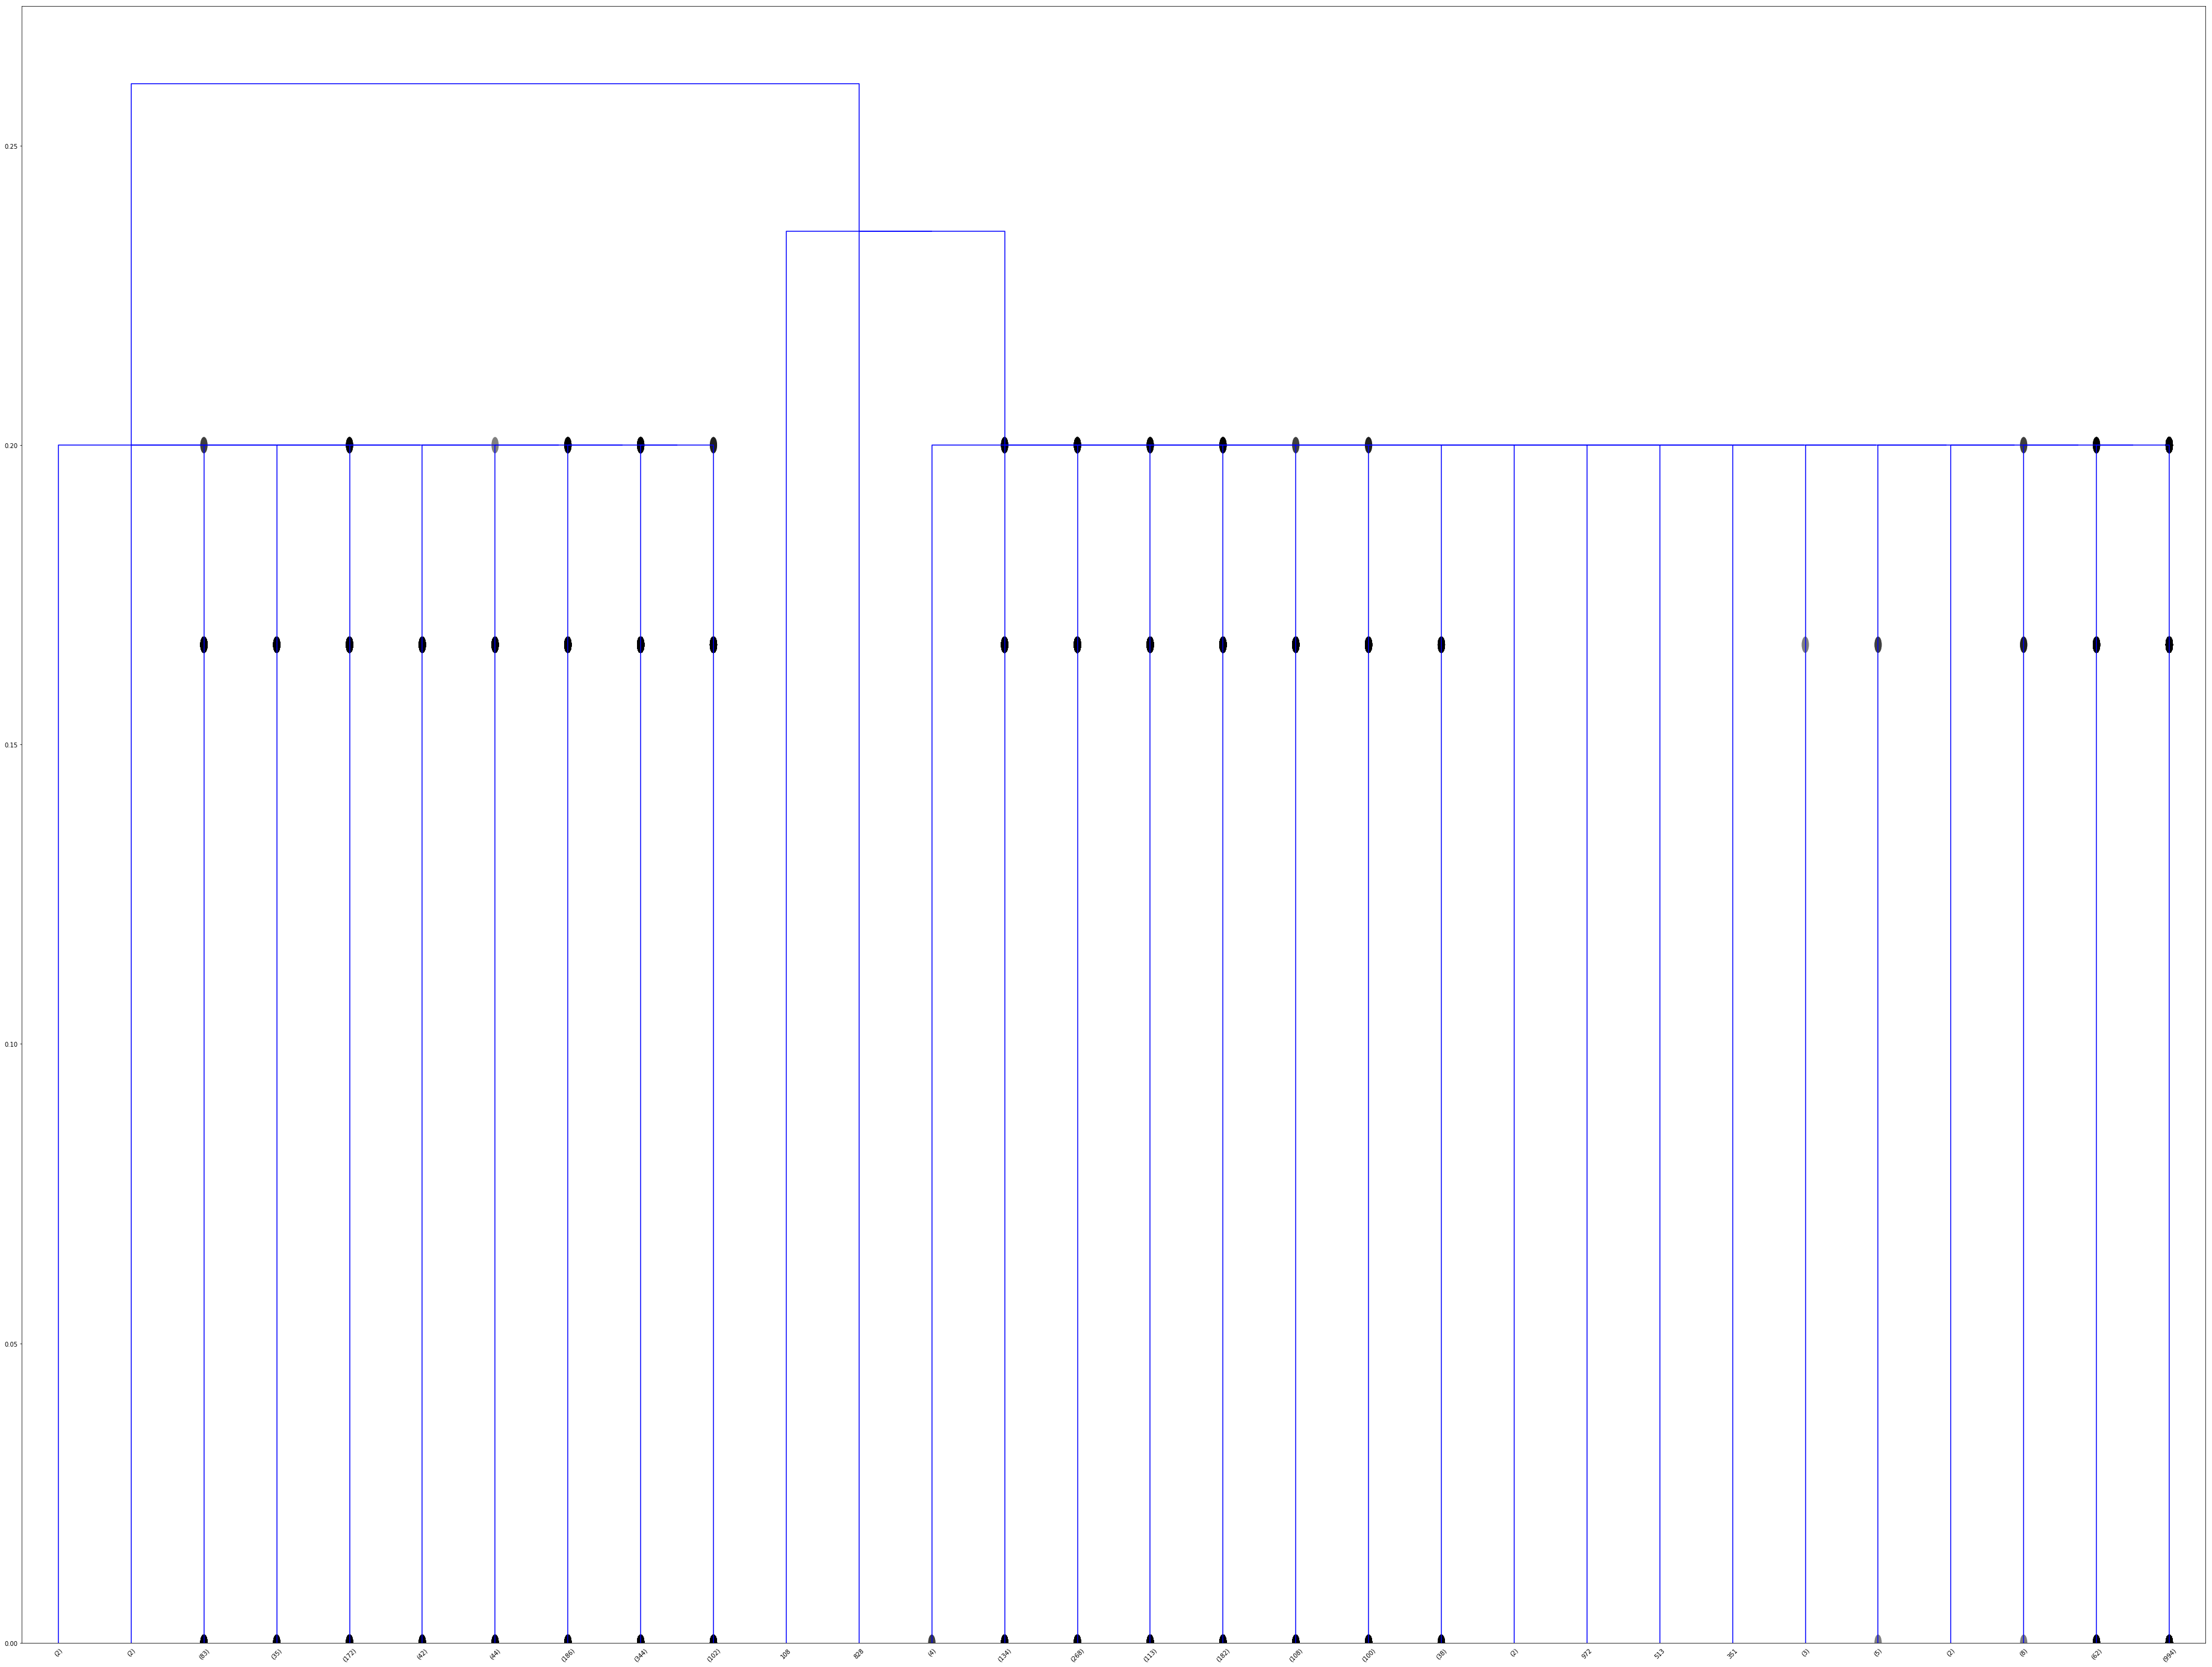

In [35]:
plt.figure(figsize=(65,50))
dendrogram(linked,orientation='top',truncate_mode='lastp',p=30,distance_sort='descending',
           show_contracted = True,show_leaf_counts=True)
plt.show()

**Using K-means Clustering**

As always, much like Hierarchical Clustering can be performed using various distance metrics, so can Kmeans. Moreover, there are variations of Kmeans (e.g. "Hartigan-Wong", "Lloyd", or "MacQueen") one can explore, which are beyond the scope of this note. **Note:** K-means does not necessarily lead to the same solution every time you run it.

In [58]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(scaled_cols.loc[:,variables_for_segementation].values)
print(cluster.labels_)
scaled_cols['hclust_num']=cluster.labels_

[2 1 2 ... 0 0 0]


In [45]:
new_scaled_data = pd.concat([mall_data[variables_for_Profile],scaled_cols], axis=1, sort=False)

In [50]:
new_scaled_data.groupby(['hclust_num']).mean()

,Income,Mall.Visits,V1,V2,V3,V4,V5,V6
hclust_num,,,,,,,,
0,30991.546389,5.500988,0.410408,0.800000,0.332510,0.796047,0.333004,0.618379
1,41907.792598,1.398221,0.080863,0.198617,0.164361,0.313636,0.757411,0.197233
2,60019.482421,2.981299,0.762959,0.294094,0.751148,0.205315,0.167979,0.406890


In [51]:
from sklearn.cluster import KMeans

1028.8664764453595
533.595746825465
471.3063866173982
431.98770505815315
393.27862074938355
378.41868936856696
365.19352119289755
351.51153926774373
341.3560370821307


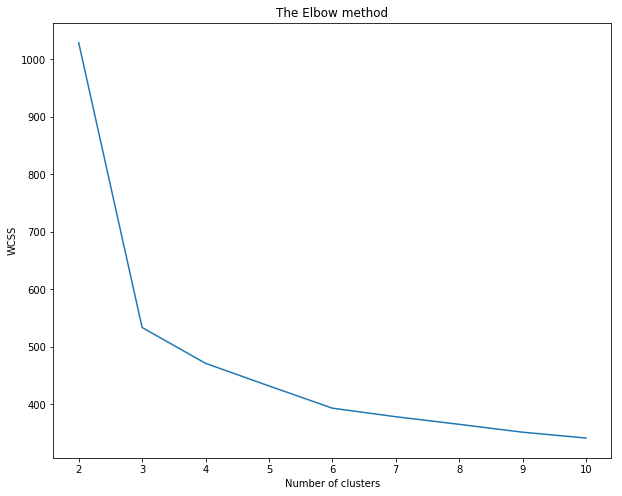

In [54]:
wccs = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(new_scaled_data.loc[:,variables_for_segementation].values)
    wccs.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(2,11),wccs)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(new_scaled_data.loc[:,variables_for_segementation].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [56]:
new_scaled_data['kmeans_cluster'] = kmeans.predict(new_scaled_data.loc[:,variables_for_segementation].values)

In [ ]:
new_scaled

## Step 7: Profile and interpret the segments 

Having decided (for now) how many clusters to use, we would like to get a better understanding of who the customers in those clusters are and interpret the segments. 

> Data analytics is used to eventually make decisions, and that is feasible only when we are comfortable (enough) with our understanding of the analytics results, including our ability to clearly interpret them. 
To this purpose, one needs to spend time visualizing and understanding the data within each of the selected segments. For example, one can see how the summary statistics (e.g. averages, standard deviations, etc) of the **profiling attributes** differ across the segments. 


In [57]:
new_scaled_data.groupby(['kmeans_cluster']).mean()

,Income,Mall.Visits,V1,V2,V3,V4,V5,V6,hclust_num
kmeans_cluster,,,,,,,,,
0,31078.336535,5.491626,0.410673,0.799409,0.333005,0.794877,0.332841,0.618325,0.005911
1,41907.792598,1.398221,0.080863,0.198617,0.164361,0.313636,0.757411,0.197233,1.000000
2,60018.487168,2.983218,0.763738,0.293189,0.751892,0.204738,0.167654,0.406318,2.000000


In [60]:
new_scaled_data.groupby(['hclust_num']).mean()

,Income,Mall.Visits,V1,V2,V3,V4,V5,V6,kmeans_cluster
hclust_num,,,,,,,,,
0,30991.546389,5.500988,0.410408,0.800000,0.332510,0.796047,0.333004,0.618379,0.000000
1,41907.792598,1.398221,0.080863,0.198617,0.164361,0.313636,0.757411,0.197233,1.000000
2,60019.482421,2.981299,0.762959,0.294094,0.751148,0.205315,0.167979,0.406890,1.994094


## Step 8: Robustness Analysis

The segmentation process outlined so far can be followed with many different approaches, for example:

- using different subsets of the original data
- using variations of the original segmentation attributes
- using different distance metrics
- using different segmentation methods
- using different numbers of clusters

> Much like any data analysis, segmentation is an iterative process with many variations of data, methods, number of clusters, and profiles generated until a satisfying solution is reached. 
Clearly exploring all variations is beyond the scope of this note. We discuss, however, an example of how to test the **statistical robustness** and **stability of interpretation** of the clusters found using two different approaches: Kmeans and Hierarchical Clustering, as outlined above. 

Basic test to perform:

How similar are the datapoints of each cluster with neighbouring clusters. How dissimilar are the members of a cluster with each other. We will be evaluating the compactness and the separation of the clusters using Silhouette Coefficient

Firstly, we'll be looking at how to perform the test by computing the **Silhouette Score**


*Sihouette Coefficient*: Evaluate how well the **compactness** and the **separation** of the clusters are.
(Note that the notation below is consistent with the above content.) Using *Sihouette Coefficient*, we can choose an optimal value for number of clusters.

***

$ a(x_i) $ denotes the **mean intra-cluster distance**. Evaluate the compactness of the cluster to which $x_i$ belongs. (The smaller the more compact)

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$  

For the data point $x_i$, caculate its average distance to all the other data points in its cluster. (Minusing one in denominator part is to leave out the current data point $x_i$)

***

$ b(x_i) $ denotes the **mean nearest-cluster distance**. Evaluate how $x_i$ is separated from other clusters. (The larger the more separated)

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

For the data point $x_i$ and all the other clusters not containing $x_i$, caculate its average distance to all the other data points in the given clusters. Find the minimum distance value with respect to the given clusters. 

***

Finally, *Silhouette Coefficient*: $ s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $. Want $a(x_i) \lt b(x_i)$ and $a(x_i) \to 0$ so as to $s(x_i) \to 1$.

In [61]:
from sklearn.metrics import silhouette_score

In [68]:
new_scaled_data.head()

,Income,Mall.Visits,V1,V2,V3,V4,V5,V6,hclust_num,kmeans_cluster
0,60000.0,3,0.833333,0.4,1.000000,0.2,0.166667,0.2,2,2
1,30000.0,1,0.166667,0.2,0.000000,0.4,0.666667,0.4,1,1
2,70000.0,3,1.000000,0.0,0.833333,0.4,0.000000,0.2,2,2
3,30000.0,7,0.500000,0.8,0.500000,0.6,0.333333,0.8,0,0
4,60000.0,1,0.000000,0.2,0.166667,0.0,0.833333,0.4,1,1


In [69]:
for n_cluster in range(2,10):
    kmeans=KMeans(n_clusters=n_cluster,init='k-means++',random_state=42)
    kmeans.fit(new_scaled_data.loc[:,variables_for_segementation].values)
    label = kmeans.labels_
    sil_coeff = silhouette_score(new_scaled_data.loc[:,variables_for_segementation].values,label,
                                 metric='euclidean')
    print("for n_clustesr={},The silhoutte coeff is {}".format(n_cluster,sil_coeff))

for n_clustesr=2,The silhoutte coeff is 0.3661244817374781
for n_clustesr=3,The silhoutte coeff is 0.4800670594729661
for n_clustesr=4,The silhoutte coeff is 0.4024199646483625
for n_clustesr=5,The silhoutte coeff is 0.31294184863293395
for n_clustesr=6,The silhoutte coeff is 0.23224779880640212
for n_clustesr=7,The silhoutte coeff is 0.22004098124885274
for n_clustesr=8,The silhoutte coeff is 0.20625581672763102
for n_clustesr=9,The silhoutte coeff is 0.20450898351877198


In [71]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [80]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init=10, 
            max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(new_scaled_data.loc[:, variables_for_segementation].values)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(new_scaled_data.loc[:, variables_for_segementation].values, 
                                     y_km, metric='euclidean')

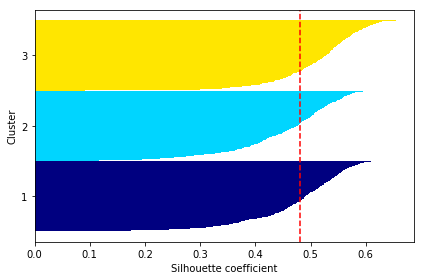

In [81]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()